In [1]:
import igraph as ig

### igraph==0.9.11

In [2]:
# 复杂网络精华案例八：Clauset-Newman-Moore(CNM)社区检测及其可视化
#!/usr/bin/python3
# -*- coding: utf-8 -*-
# Author ： 单哥的科研日常
# 关注B站和公众号：单哥的科研日常，获取更多讲解教程

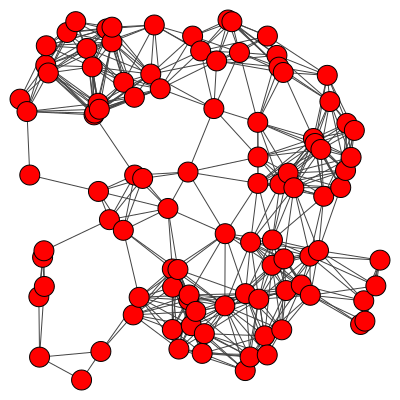

In [3]:
# 生成随机几何网络
N = 100
g = ig.Graph.GRG(N,0.2)
ig.plot(g, bbox=(0, 0, 400, 400), target="1.png")

In [4]:
# 社区划分的层次结果
hierarchy1= ig.Graph.community_fastgreedy(g)
# 分区结果
partition1 = ig.Graph.community_fastgreedy(g).as_clustering()

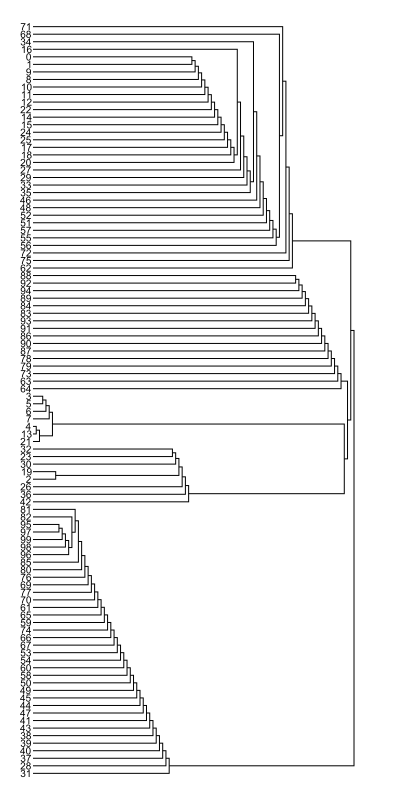

In [5]:
# 社区划分的层次结果可视化
ig.plot(hierarchy1, bbox=(0, 0, 400, 800), target="2.png")

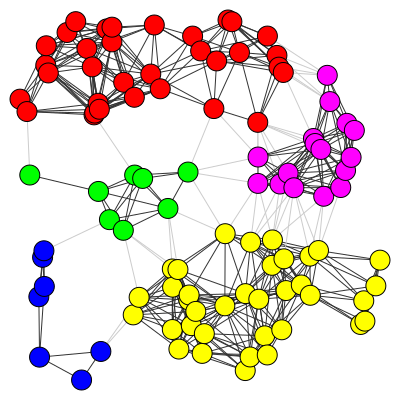

In [6]:
# 社区划分的网络可视化
ig.plot(partition1, bbox=(0, 0, 400, 400), target="3.png")

In [7]:
import numpy as np

In [8]:
# 借助igraph得到每合并一个节点后的划分结果和模块度值
nums = np.linspace(N,2,N-1)
Q = []
i = 0
Nc = []
for c in nums:
    com = ig.Graph.community_fastgreedy(g).as_clustering(n=int(c))
    print("第{}次划分结果：\n{}".format(i, com))
    print("第{}次划分对应的模块度值：{}".format(i, ig.Graph.modularity(g, com)))
    Nc.append(len(com))
    Q.append(ig.Graph.modularity(g, com))
    i += 1

# 最后一步合并：所有节点组成一个划分
com0 = list(range(N))
print("第{}次划分结果：\n{}".format(i, com0))
print("第{}次划分对应的模块度值：{}".format(i, ig.Graph.modularity(g, com0)))
Nc.append(1)
Q.append(ig.Graph.modularity(g, com0))
max_index = Q.index(max(Q))
print("最佳划分对应的社团数量为{}，模块度值为{}".format(Nc[max_index], max(Q)))

第0次划分结果：
Clustering with 100 elements and 100 clusters
[  0] 0
[  1] 1
[  2] 2
[  3] 3
[  4] 4
[  5] 5
[  6] 6
[  7] 7
[  8] 8
[  9] 9
[ 10] 10
[ 11] 11
[ 12] 12
[ 13] 13
[ 14] 14
[ 15] 15
[ 16] 16
[ 17] 17
[ 18] 18
[ 19] 19
[ 20] 20
[ 21] 21
[ 22] 22
[ 23] 23
[ 24] 24
[ 25] 25
[ 26] 26
[ 27] 27
[ 28] 28
[ 29] 29
[ 30] 30
[ 31] 31
[ 32] 32
[ 33] 33
[ 34] 34
[ 35] 35
[ 36] 36
[ 37] 37
[ 38] 38
[ 39] 39
[ 40] 40
[ 41] 41
[ 42] 42
[ 43] 43
[ 44] 44
[ 45] 45
[ 46] 46
[ 47] 47
[ 48] 48
[ 49] 49
[ 50] 50
[ 51] 51
[ 52] 52
[ 53] 53
[ 54] 54
[ 55] 55
[ 56] 56
[ 57] 57
[ 58] 58
[ 59] 59
[ 60] 60
[ 61] 61
[ 62] 62
[ 63] 63
[ 64] 64
[ 65] 65
[ 66] 66
[ 67] 67
[ 68] 68
[ 69] 69
[ 70] 70
[ 71] 71
[ 72] 72
[ 73] 73
[ 74] 74
[ 75] 75
[ 76] 76
[ 77] 77
[ 78] 78
[ 79] 79
[ 80] 80
[ 81] 81
[ 82] 82
[ 83] 83
[ 84] 84
[ 85] 85
[ 86] 86
[ 87] 87
[ 88] 88
[ 89] 89
[ 90] 90
[ 91] 91
[ 92] 92
[ 93] 93
[ 94] 94
[ 95] 95
[ 96] 96
[ 97] 97
[ 98] 98
[ 99] 99
第0次划分对应的模块度值：-0.01132334028393412
第1次划分结果：
Clustering w

In [9]:
import matplotlib.pyplot as plt

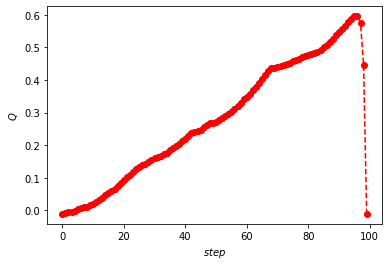

In [10]:
# 绘制算法过程中的模块度Q ，横轴表示合并的次数
plt.plot(Q, "ro--")
plt.xlabel("$step$")
plt.ylabel("$Q$")
plt.savefig("4.png", dpi=300)